<a href="https://colab.research.google.com/github/slarkdev/AnomaliesDetection/blob/main/anomaly_detection_cnn_lesly_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --ignore-installed --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 535.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 77.8 MB/s eta 0:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = './drive/MyDrive/3w_dataset_anomalias_agrupadas/combinado_A02.csv'
TimeSeries = pd.read_csv(path, parse_dates=['timestamp'], index_col='timestamp')
#TimeSeries = pd.read_csv(path, parse_dates=['timestamp'])

In [ ]:
TimeSeries['class'].value_counts()

,count
class,
102.0,88388
0.0,52651
2.0,16615


In [ ]:
# Definir una función para crear secuencias de longitud sequence_length
def create_sequences(data, sequence_length):
 X = []
 y = []
 for i in range(len(data) - sequence_length):
    X.append(data.iloc[i:i+sequence_length][input_columns].values)
    y.append(data.iloc[i+sequence_length][output_columns].values)
 return np.array(X), np.array(y)

In [ ]:
VentanaTiempo = 300 # segun tipo de anomalia, Anomalia 02 1200 segundos

# reshape to [samples, time_steps, n_features]
# Crear secuencias de entrenamiento
X_train, y_train = create_sequences(train, VentanaTiempo)
X_test, y_test = create_sequences(test, VentanaTiempo)

#X_t=X_train.reshape(851,30)
print(X_train.shape)
print(X_test.shape)

(109626, 300, 3)
(46812, 300, 3)


In [ ]:
X_test.shape

(46812, 300, 3)

In [ ]:
y_train.shape

(109626, 1)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

model = keras.Sequential()

neuronas = 128
columnas_serie_temporal = 5

model = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=5, activation="relu", input_shape=[VentanaTiempo, columnas_serie_temporal]),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=64, kernel_size=5, activation="relu"),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'f1_score'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 298, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 149, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 147, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4672)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       299,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,665 (1.17 MB)

 Trainable params: 305,665 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9745 - f1_score: 0.8081 - loss: 0.0837 - precision: 0.9892 - recall: 0.9729 - val_accuracy: 0.7450 - val_f1_score: 0.7997 - val_loss: 0.9824 - val_precision: 0.9013 - val_recall: 0.6879
Epoch 2/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9916 - f1_score: 0.8164 - loss: 0.0353 - precision: 0.9972 - recall: 0.9903 - val_accuracy: 0.7568 - val_f1_score: 0.7974 - val_loss: 1.5771 - val_precision: 0.9037 - val_recall: 0.7057
Epoch 3/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9941 - f1_score: 0.8133 - loss: 0.0277 - precision: 0.9987 - recall: 0.9926 - val_accuracy: 0.7977 - val_f1_score: 0.8005 - val_loss: 1.1795 - val_precision: 0.9108 - val_recall: 0.7678
Epoch 4/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9949 - f1_score: 0.8155 - loss: 0.0251 - precision: 0.9991 - recall: 0.9935 - val_accuracy: 0.8419 - val_f1_score: 0.8018 - val_loss: 1.1556 - val_precision: 0.9173 - val

In [ ]:
ruta = /content/drive/My Drive/3w-dataset-train-test/entrenamientos/

In [ ]:
model.save( ruta + 'modelo_cnn_e5_bs_32_acc_99.h5')

In [ ]:
import pickle

ruta_drive = ruta + 'modelo_cnn_e5_bs_32_acc_99.pkl'  # Ruta en Google Drive

# Guardar el history en la ruta específica
with open(ruta_drive, "wb") as f:
    pickle.dump(history.history, f)

print("Historial guardado correctamente en:", ruta_drive)


Historial guardado correctamente en: /content/drive/My Drive/modelo_cnn_e5_bs_32_acc_99.pkl


In [ ]:
from tensorflow.keras.models import load_model

# Cargar modelo guardado
modelo_cargado = load_model(ruta + 'modelo_cnn_e5_bs_32_acc_99.h5')

# Confirmar que el modelo se ha cargado
modelo_cargado.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 298, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 149, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 147, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4672)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       299,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,667 (1.17 MB)

 Trainable params: 305,665 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
with open(ruta_drive, "rb") as f:
    history_cargado = pickle.load(f)

print("Métricas guardadas:", history_cargado.keys())  # Ver qué datos están disponibles


Métricas guardadas: dict_keys(['accuracy', 'f1_score', 'loss', 'precision', 'recall', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision', 'val_recall'])


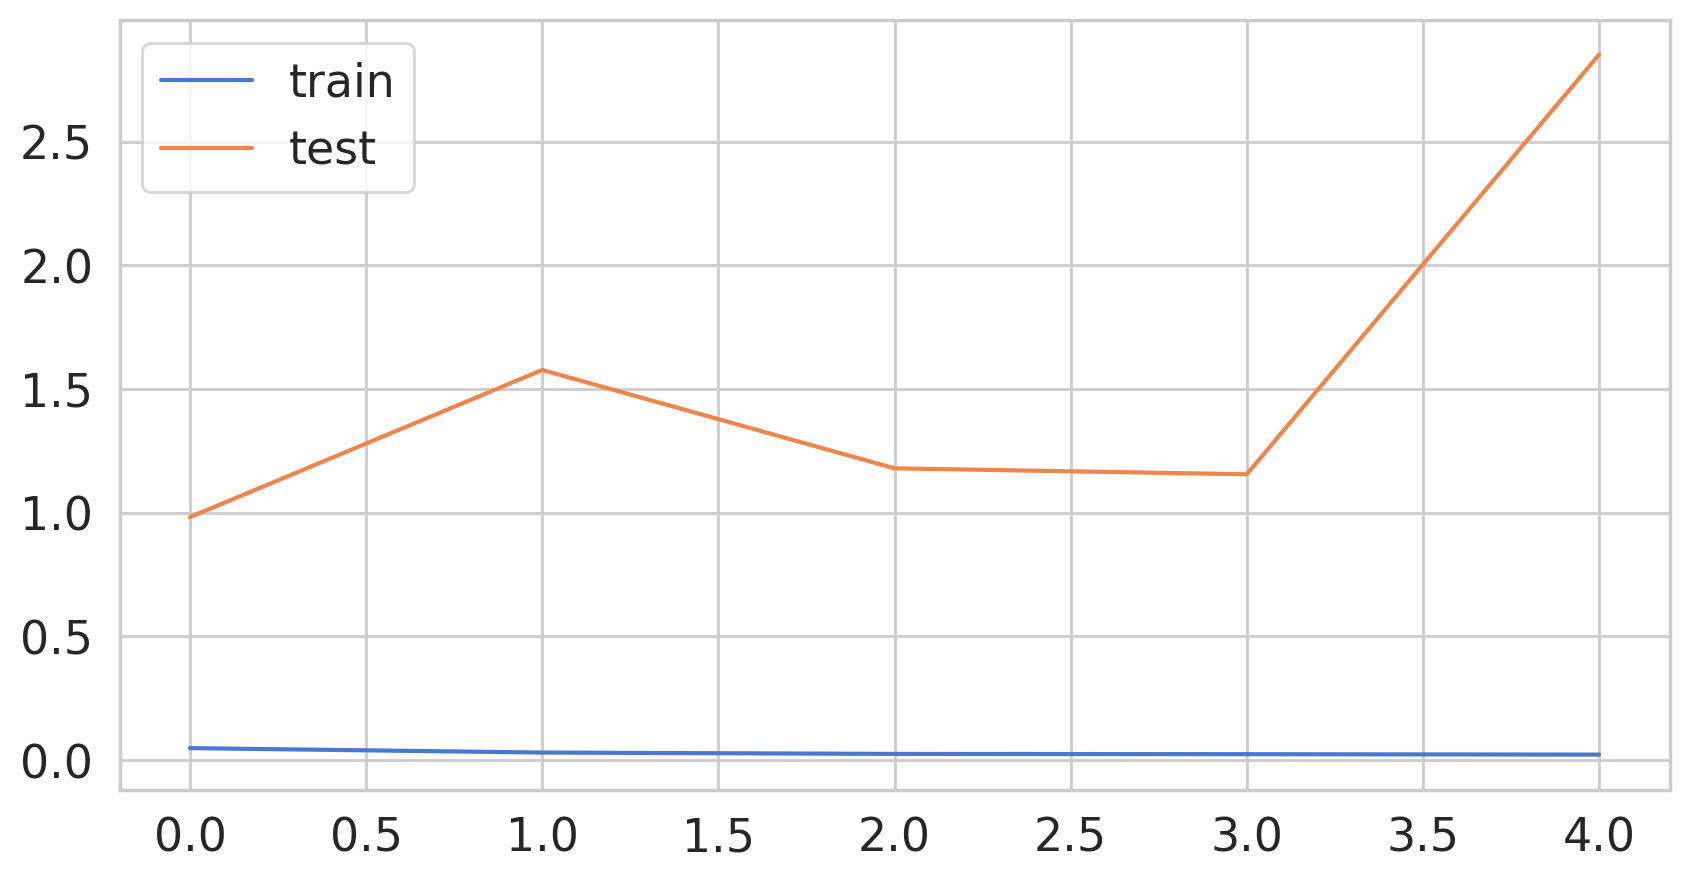

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_cargado['loss'], label='train')
plt.plot(history_cargado['val_loss'], label='test')
plt.legend();

In [ ]:
loss, accuracy, precision, recall, f1_score = modelo_cargado.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1_score}')

1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8599 - f1_score: 0.8634 - loss: 2.0079 - precision_2: 0.9502 - recall_2: 0.7727
Test loss: 2.851616144180298
Test accuracy: 0.716739296913147
Test precision: 0.8956313729286194
Test recall: 0.6447697281837463
Test f1_score: 0.8700344562530518


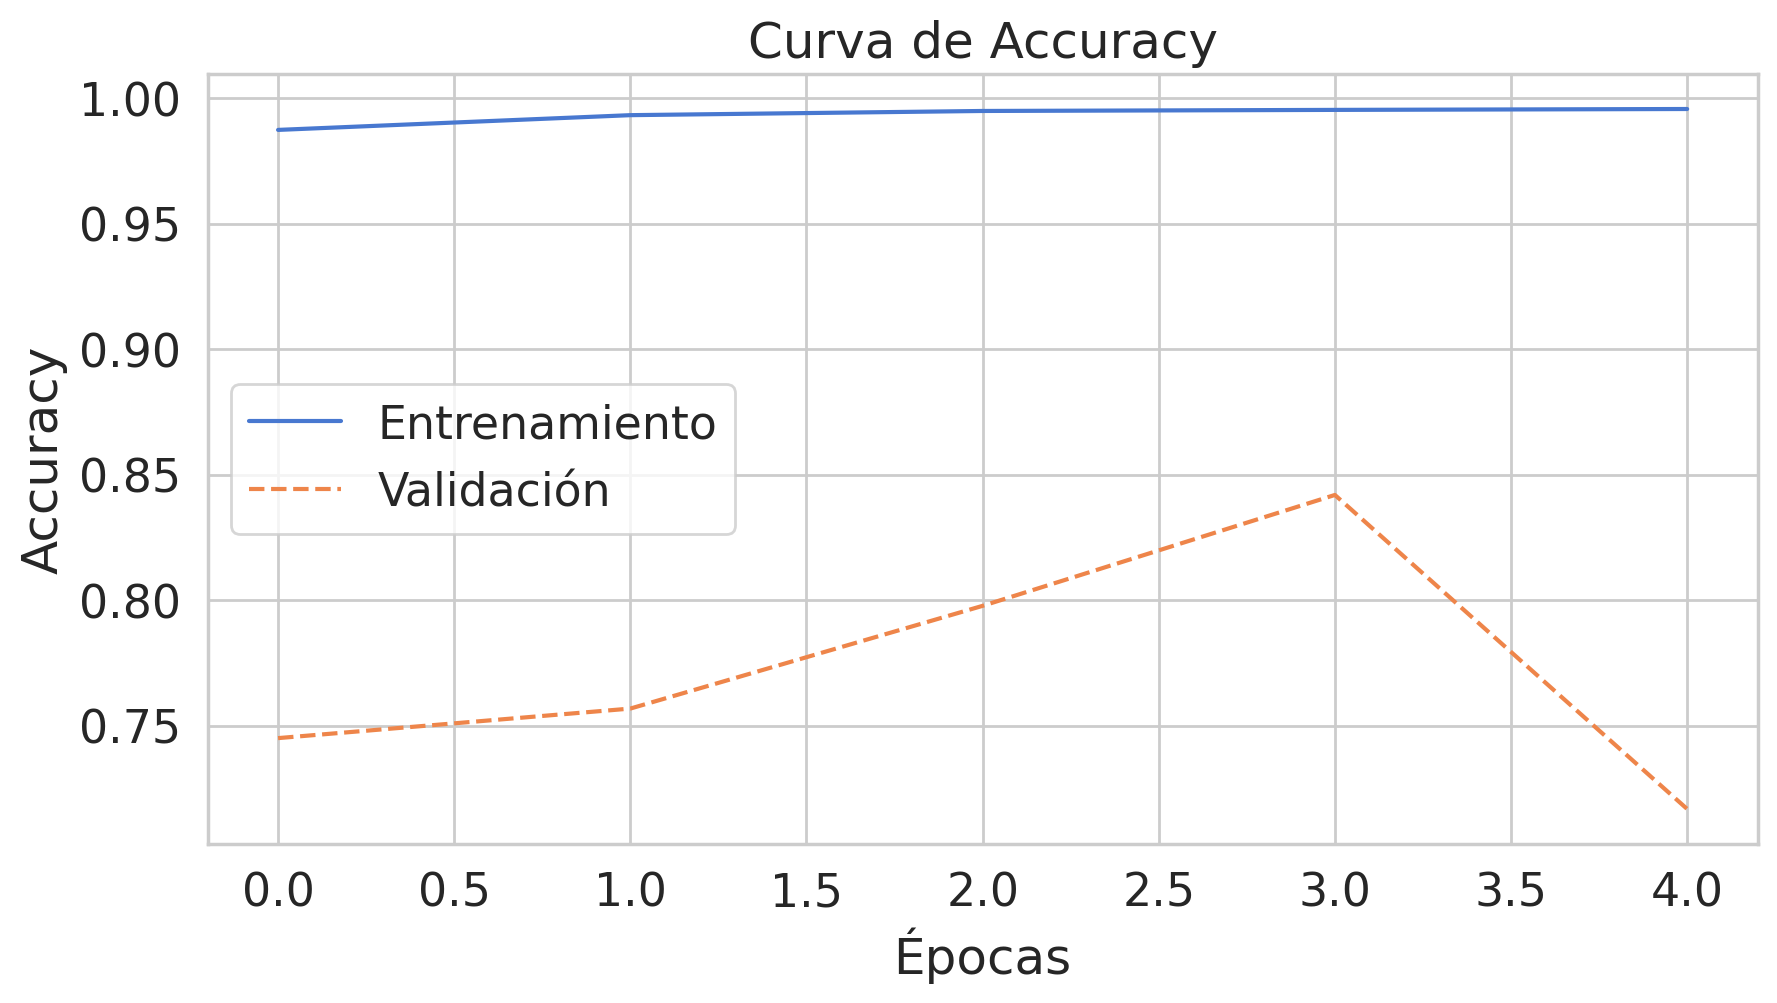

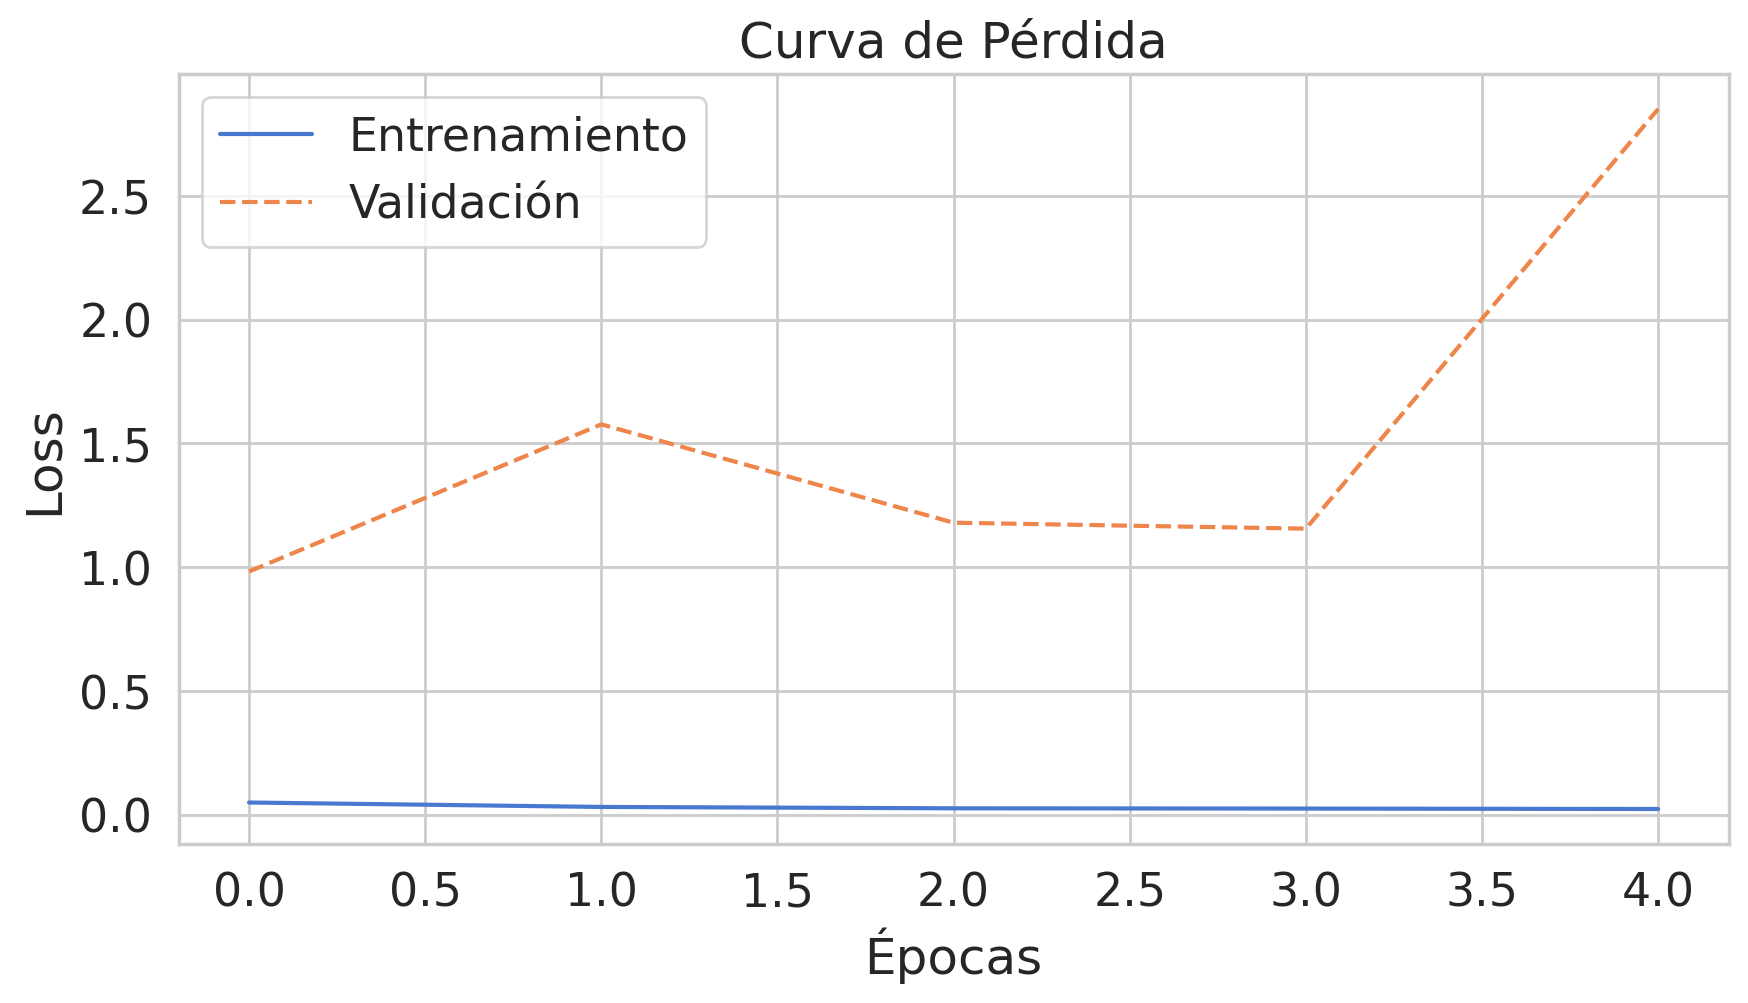

In [ ]:
# Historial de entrenamiento
#history_dict = history.history
history_dict = history_cargado

# 📊 Gráfica de accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_dict["accuracy"], label="Entrenamiento")
plt.plot(history_dict["val_accuracy"], label="Validación", linestyle="dashed")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.title("Curva de Accuracy")
plt.legend()
plt.show()

# 📊 Gráfica de pérdida (loss)
plt.figure(figsize=(10, 5))
plt.plot(history_dict["loss"], label="Entrenamiento")
plt.plot(history_dict["val_loss"], label="Validación", linestyle="dashed")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Curva de Pérdida")
plt.legend()
plt.show()


In [ ]:
X_test_pred = modelo_cargado.predict(X_test)

1463/1463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [ ]:
X_test_pred_2 = np.expand_dims(X_test_pred, axis=1)  # Agrega dimensión en la posición correcta
X_test_pred_2 = np.repeat(X_test_pred_2, X_test.shape[1], axis=1)  # Expande a 300 timesteps

X_test_pred_2 = np.tile(X_test_pred_2, (1, 3))

print("Forma de X_test:", X_test.shape)
print("Forma de X_test_pred:", X_test_pred_2.shape)

Forma de X_test: (46812, 300, 3)
Forma de X_test_pred: (46812, 300, 3)


In [ ]:
test_mae_loss = np.mean(np.abs( X_test - X_test_pred_2), axis=1)

<ipython-input-44-31ca0369e6a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss, bins=50, kde=True);


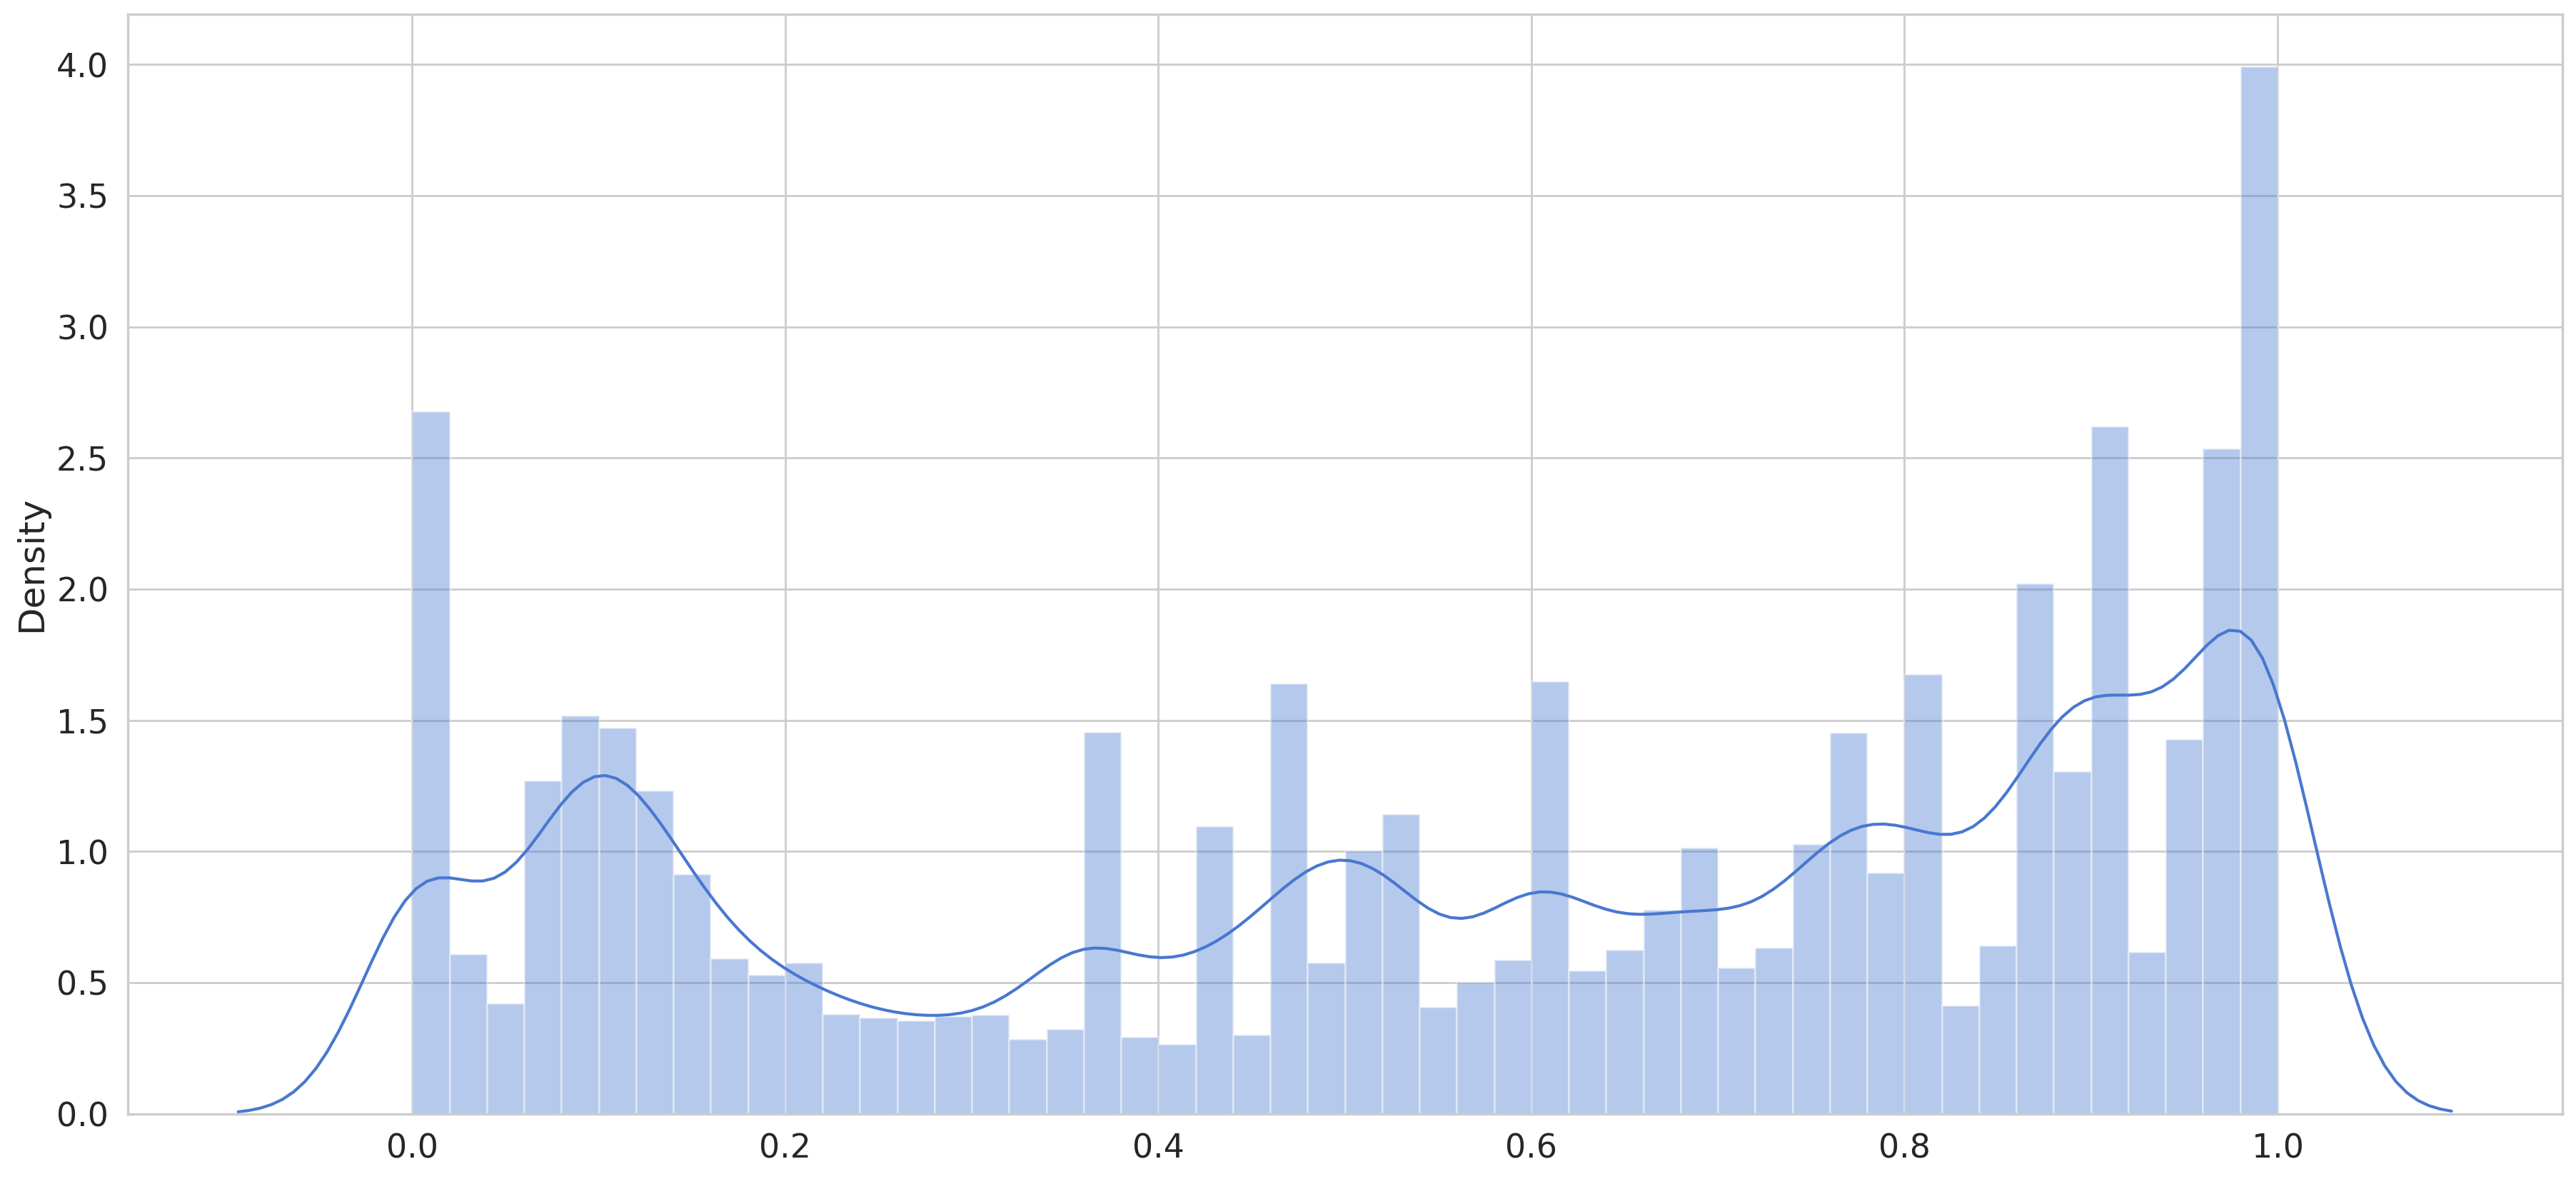

In [ ]:
sns.distplot(test_mae_loss, bins=50, kde=True);